In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
dataset = pd.read_csv('/content/drive/MyDrive/WeatherMLProject/WeatherDataDataSet.csv')

In [ ]:
dfc = dataset = pd.read_csv('/content/WeatherDataCollect - Sheet1.csv')

In [ ]:
df = dataset

In [ ]:
df2 = dataset

In [ ]:
df.head(10)

,DHT Temp (°C),Humidity (%),BMP Temp (°C),Pressure (hPa),Altitude (m),Light (lx),Rain_Status
0,29.0,87.3,28.4,1007.15,23.83,0.0,Dry
1,29.0,87.1,28.4,1007.11,24.17,0.0,Dry
2,29.1,87.1,28.3,1007.12,24.08,0.0,Dry
3,29.0,86.9,28.4,1007.10,24.25,0.0,Dry
4,29.0,87.0,28.3,1007.03,24.84,0.0,Dry
5,29.1,87.0,28.3,1007.03,24.84,0.0,Dry
6,29.2,87.4,28.4,1007.06,24.59,0.0,Dry
7,29.1,87.3,28.3,1006.95,25.51,0.0,Dry
8,29.1,86.9,28.2,1007.01,25.00,0.0,Dry
9,28.9,86.9,28.2,1007.00,25.09,0.0,Dry


In [ ]:
numeric_cols = df.select_dtypes(include=[np.number])

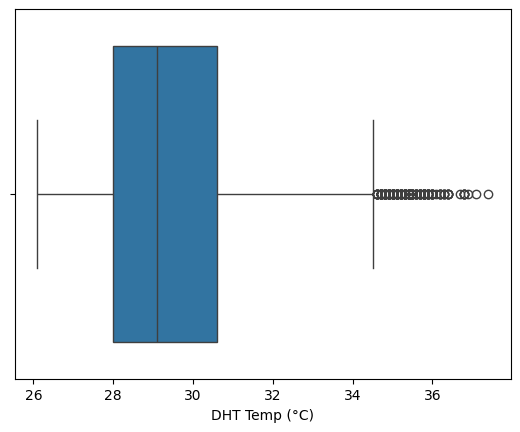

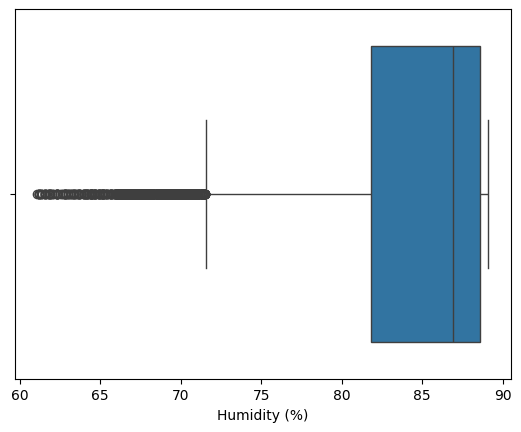

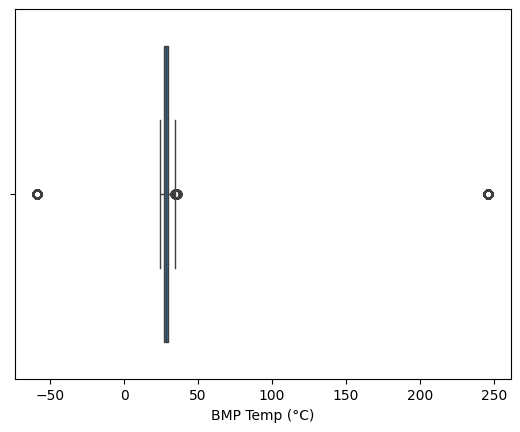

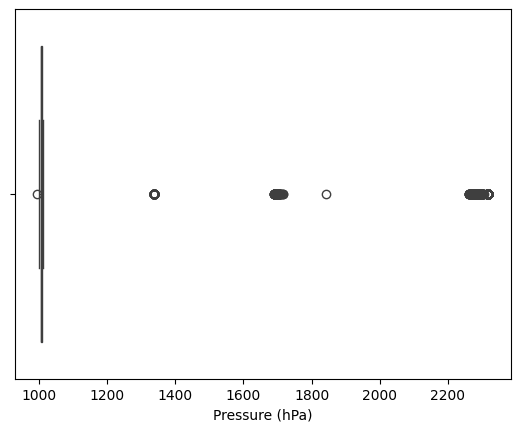

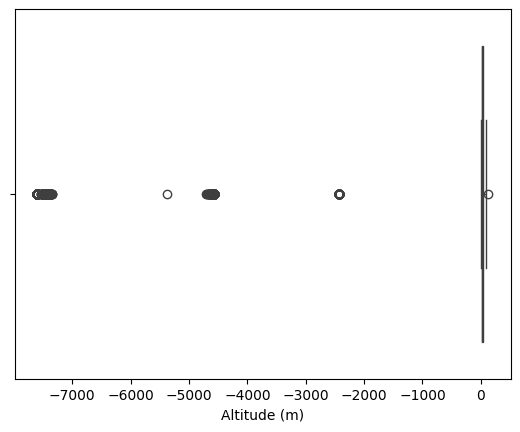

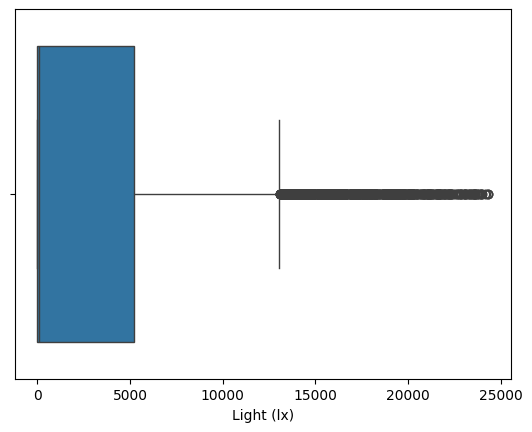

In [ ]:
for i in df.select_dtypes(include='number').columns :
  sns.boxplot(data=df, x=i)
  plt.show()

In [ ]:
from scipy import stats
z_scores = np.abs(stats.zscore(numeric_cols))

In [ ]:
threshold = 3

In [ ]:
df_no_outliers = df[(z_scores < threshold).all(axis=1)]

In [ ]:
print("Original shape:", df.shape)
print("After removing outliers:", df_no_outliers.shape)
print(df_no_outliers)

Original shape: (16438, 7)
After removing outliers: (14475, 7)
       DHT Temp (°C)  Humidity (%)  BMP Temp (°C)  Pressure (hPa)  \
0               29.0          87.3           28.4         1007.15   
1               29.0          87.1           28.4         1007.11   
2               29.1          87.1           28.3         1007.12   
3               29.0          86.9           28.4         1007.10   
4               29.0          87.0           28.3         1007.03   
...              ...           ...            ...             ...   
16433           27.5          88.6           26.8         1009.77   
16434           27.5          88.6           26.8         1009.74   
16435           27.5          88.6           26.8         1009.74   
16436           27.5          88.6           26.8         1009.82   
16437           27.5          88.6           26.8         1009.70   

       Altitude (m)  Light (lx) Rain_Status  
0             23.83        0.00         Dry  
1             24

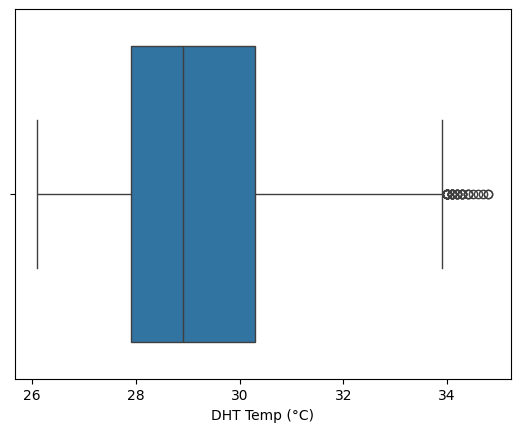

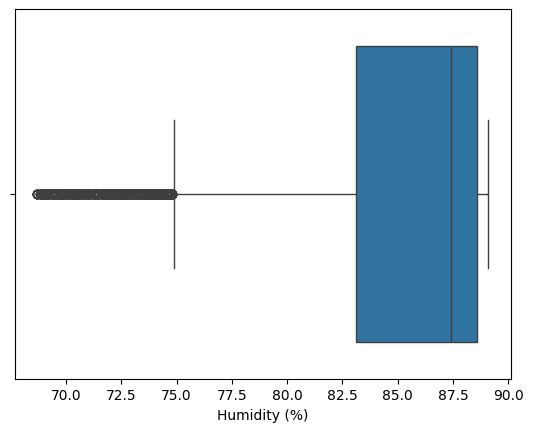

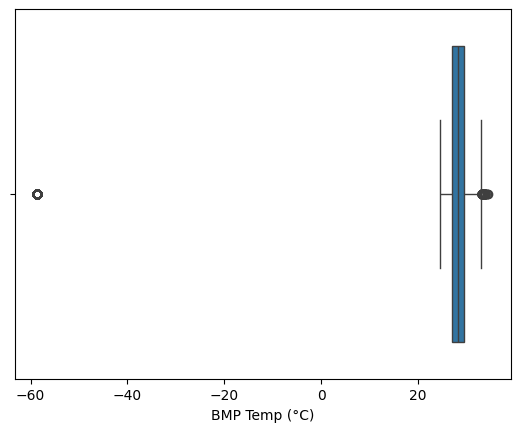

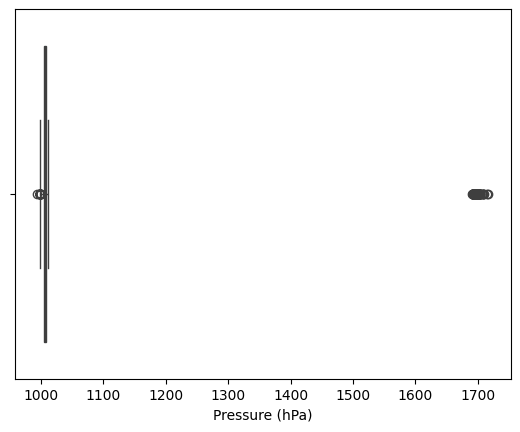

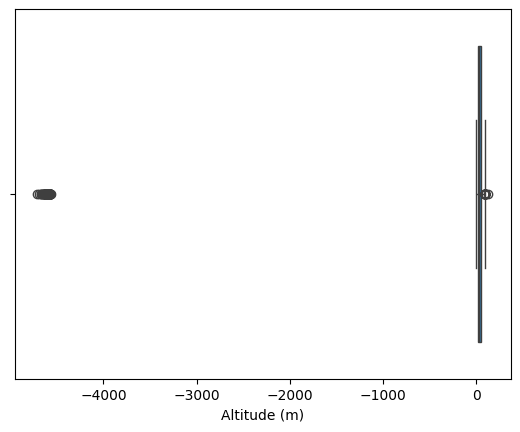

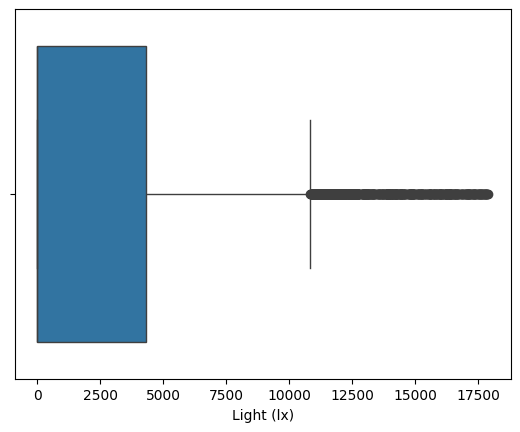

In [ ]:
for i in df.select_dtypes(include='number').columns :
  sns.boxplot(data=df_no_outliers, x=i)
  plt.show()

In [ ]:
print("Before removing outliers:\n", df.describe())
print("\nAfter removing outliers:\n", df_no_outliers.describe())


Before removing outliers:
        DHT Temp (°C)  Humidity (%)  BMP Temp (°C)  Pressure (hPa)  \
count   16438.000000  16438.000000   16438.000000    16438.000000   
mean       29.430691     84.574717      28.943296     1113.970723   
std         1.903084      5.294058      45.501568      342.544837   
min        26.100000     61.100000     -58.600000      994.670000   
25%        28.000000     81.800000      26.900000     1004.500000   
50%        29.100000     86.900000      28.300000     1006.530000   
75%        30.600000     88.600000      29.900000     1008.240000   
max        37.400000     89.100000     246.300000     2319.140000   

       Altitude (m)    Light (lx)  
count  16438.000000  16438.000000  
mean    -612.051845   3198.949251  
std     2026.267839   4900.400961  
min    -7597.460000     -1.000000  
25%       14.710000      0.830000  
50%       29.020000     62.915000  
75%       46.040000   5224.582500  
max      128.840000  24340.000000  

After removing outliers:
 

In [ ]:
df_clean = df_no_outliers[
    (df_no_outliers['BMP Temp (°C)'] > 0) &
    (df_no_outliers['Pressure (hPa)'] < 1100) &
    (df_no_outliers['Altitude (m)'] >= 0)
]


In [ ]:
df_clean['Pressure (hPa)'].min()

994.67

In [ ]:
df_clean.loc[(df_clean['Light (lx)'] >= 0) & (df_clean['Light (lx)'] <= 10), 'Light (lx)'] = 0

print(df_clean[['Light (lx)']].head())


   Light (lx)
0         0.0
1         0.0
2         0.0
3         0.0
4         0.0


In [ ]:
df_clean.to_csv('DataFrameCleanUsingZ-Score.csv', index=False)

In [ ]:
dfc['Pressure (hPa)'].min(), dfc['Pressure (hPa)'].max()

(994.67, 2319.14)

In [ ]:
print(df['DHT Temp (°C)'].min(), df['DHT Temp (°C)'].max())
print(dataset['DHT Temp (°C)'].min(), dataset['DHT Temp (°C)'].max())

26.1 37.4
26.1 37.4


In [ ]:
print(df['BMP Temp (°C)'].min(), df['BMP Temp (°C)'].max())
print(dataset['BMP Temp (°C)'].min(), dataset['BMP Temp (°C)'].max())

-58.6 246.3
-58.6 246.3


In [ ]:
print(df['Altitude (m)'].min(), df['Altitude (m)'].max())
print(dataset['Altitude (m)'].min(), dataset['Altitude (m)'].max())

-7597.46 128.84
-7597.46 128.84


In [ ]:
df['Light (lx)'].min(), df['Light (lx)'].max()

(-1.0, 24340.0)

In [ ]:
df_cleaned = df[(df.select_dtypes(include='number') >= 0).all(axis=1)]
print(df_cleaned.head())


   DHT Temp (°C)  Humidity (%)  BMP Temp (°C)  Pressure (hPa)  Altitude (m)  \
0           29.0          87.3           28.4         1007.15         23.83   
1           29.0          87.1           28.4         1007.11         24.17   
2           29.1          87.1           28.3         1007.12         24.08   
3           29.0          86.9           28.4         1007.10         24.25   
4           29.0          87.0           28.3         1007.03         24.84   

   Light (lx) Rain_Status  
0         0.0         Dry  
1         0.0         Dry  
2         0.0         Dry  
3         0.0         Dry  
4         0.0         Dry  


In [ ]:
df = df_cleaned

In [ ]:
print(df['BMP Temp (°C)'].min(), df['BMP Temp (°C)'].max())
print(dataset['BMP Temp (°C)'].min(), dataset['BMP Temp (°C)'].max())

24.6 246.3
-58.6 246.3


In [ ]:
print(df['Altitude (m)'].min(), df['Altitude (m)'].max())
print(dataset['Altitude (m)'].min(), dataset['Altitude (m)'].max())

0.33 128.84
-7597.46 128.84


In [ ]:
df.shape

(14680, 7)

<Axes: xlabel='BMP Temp (°C)'>

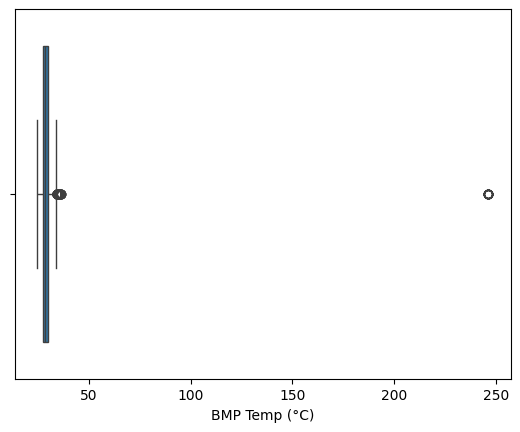

In [ ]:
sns.boxplot(x = 'BMP Temp (°C)', data = df)

<Axes: xlabel='Altitude (m)'>

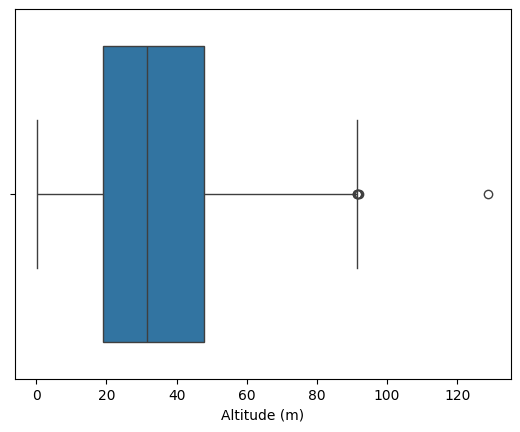

In [ ]:
sns.boxplot(x = 'Altitude (m)', data = df)

<Axes: xlabel='Light (lx)'>

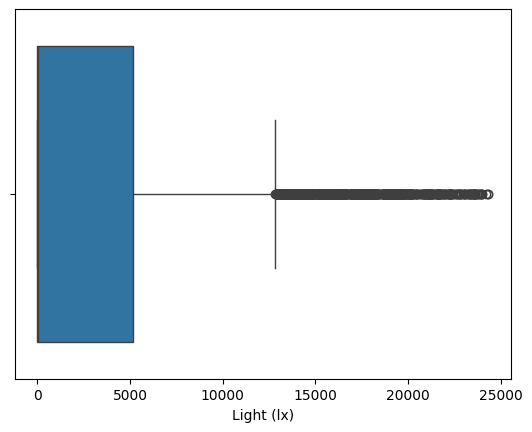

In [ ]:
sns.boxplot(x = 'Light (lx)', data = df)

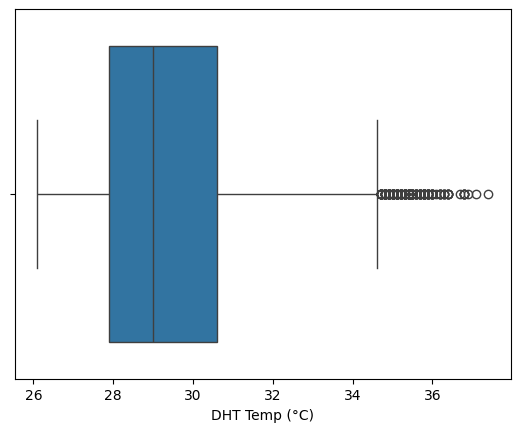

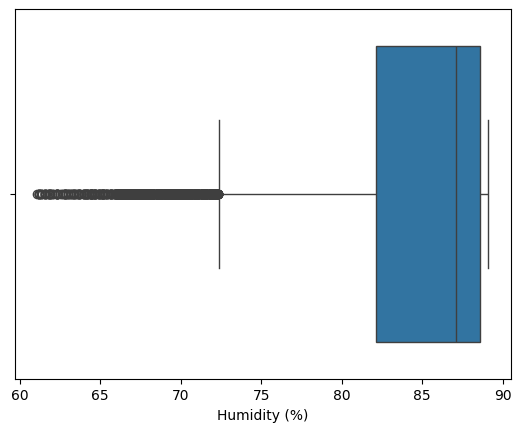

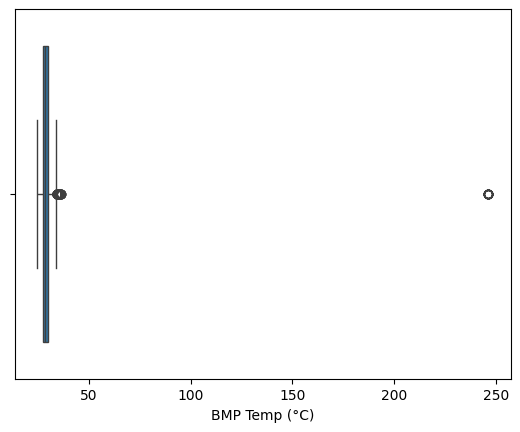

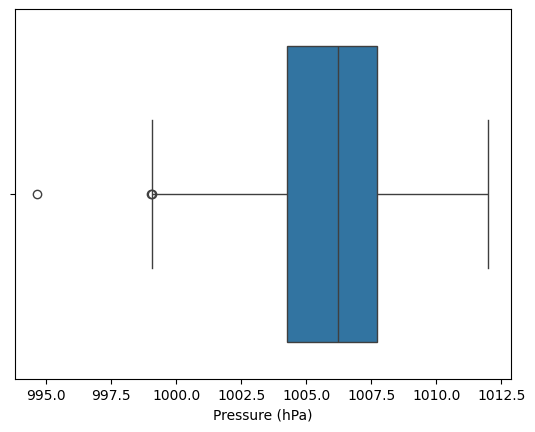

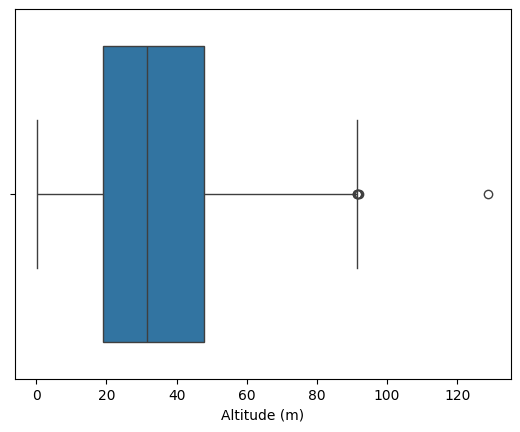

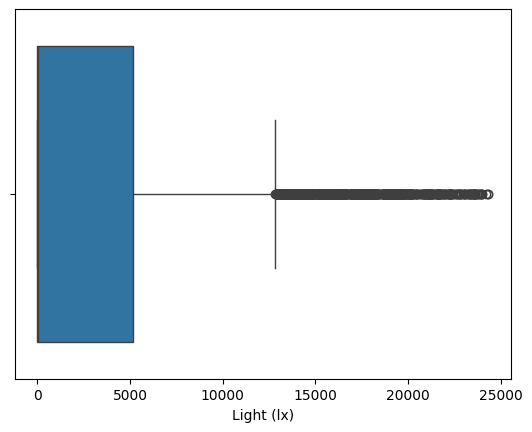

In [ ]:
for i in df.select_dtypes(include='number').columns :
  sns.boxplot(data=df, x=i)
  plt.show()

In [ ]:
df['Light (lx)'].max()

24340.0

In [ ]:
df['DHT Temp (°C)'].min(), df['DHT Temp (°C)'].max()

(26.1, 37.4)

Min range : 23.849999999999994
Max range : 34.650000000000006


,DHT Temp (°C),Humidity (%),BMP Temp (°C),Pressure (hPa),Altitude (m),Light (lx),Rain_Status
0,29.0,87.3,28.4,1007.15,23.83,0.0,Dry
1,29.0,87.1,28.4,1007.11,24.17,0.0,Dry
2,29.1,87.1,28.3,1007.12,24.08,0.0,Dry
3,29.0,86.9,28.4,1007.10,24.25,0.0,Dry
4,29.0,87.0,28.3,1007.03,24.84,0.0,Dry


/tmp/ipython-input-104436525.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['DHT Temp (°C)']= df_filtered['DHT Temp (°C)']


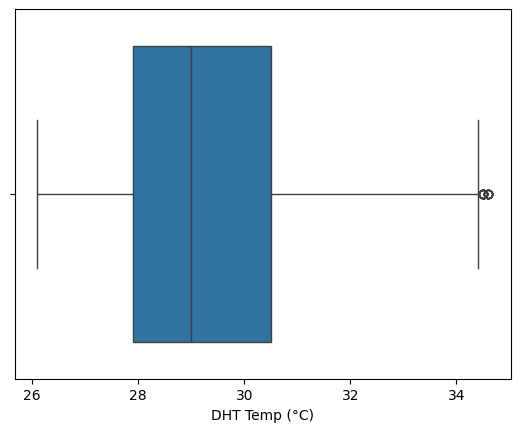

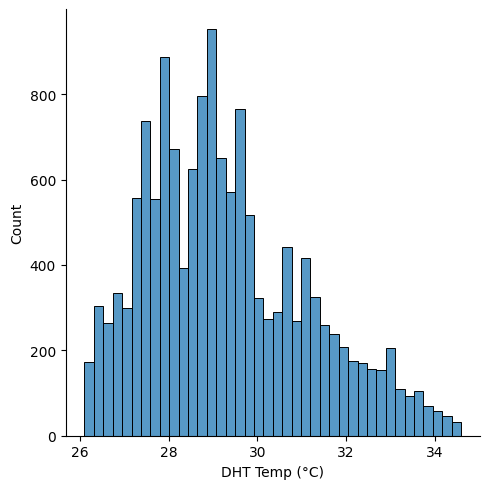

In [ ]:
q1 = df['DHT Temp (°C)'].quantile(0.25)
q2 = df['DHT Temp (°C)'].quantile(0.75)
iqr = q2 - q1

min_range = q1 - (1.5 * iqr)
max_range = q2 + (1.5 * iqr)

print(f'Min range : {min_range}')
print(f'Max range : {max_range}')

df_filtered = df[(df['DHT Temp (°C)'] >= min_range) & (df['DHT Temp (°C)'] <= max_range)]
display(df_filtered.head())



sns.boxplot(x = 'DHT Temp (°C)', data = df_filtered)

sns.displot(df_filtered['DHT Temp (°C)'])
df['DHT Temp (°C)']= df_filtered['DHT Temp (°C)']

In [ ]:
df['DHT Temp (°C)'].min(), df['DHT Temp (°C)'].max()

(26.1, 34.6)

In [ ]:
df.columns

Index(['DHT Temp (°C)', 'Humidity (%)', 'BMP Temp (°C)', 'Pressure (hPa)',
       'Altitude (m)', 'Light (lx)', 'Rain_Status'],
      dtype='object')

Min range : 23.15
Max range : 33.949999999999996


,DHT Temp (°C),Humidity (%),BMP Temp (°C),Pressure (hPa),Altitude (m),Light (lx),Rain_Status
0,29.0,87.3,28.4,1007.15,23.83,0.0,Dry
1,29.0,87.1,28.4,1007.11,24.17,0.0,Dry
2,29.1,87.1,28.3,1007.12,24.08,0.0,Dry
3,29.0,86.9,28.4,1007.10,24.25,0.0,Dry
4,29.0,87.0,28.3,1007.03,24.84,0.0,Dry


/tmp/ipython-input-790277948.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['BMP Temp (°C)']= df_filtered['BMP Temp (°C)']


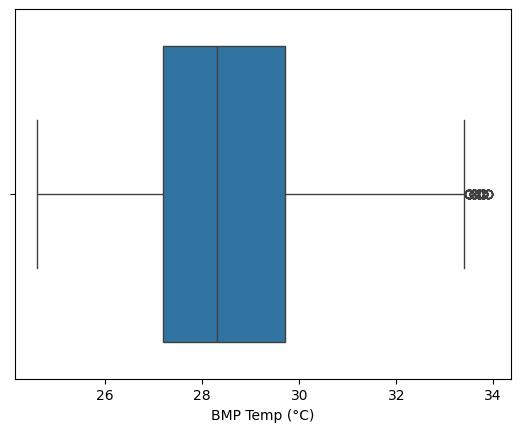

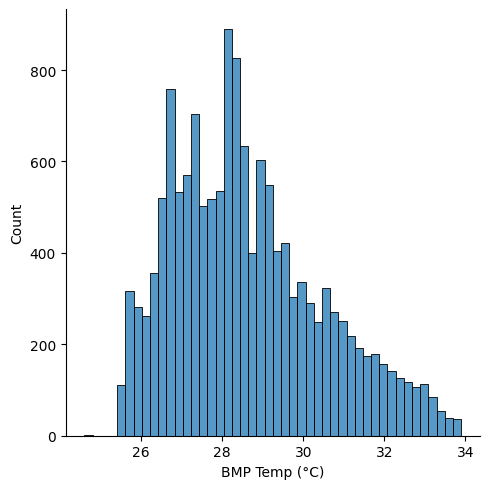

In [ ]:
q1 = df['BMP Temp (°C)'].quantile(0.25)
q2 = df['BMP Temp (°C)'].quantile(0.75)
iqr = q2 - q1

min_range = q1 - (1.5 * iqr)
max_range = q2 + (1.5 * iqr)

print(f'Min range : {min_range}')
print(f'Max range : {max_range}')

df_filtered = df[(df['BMP Temp (°C)'] >= min_range) & (df['BMP Temp (°C)'] <= max_range)]
display(df_filtered.head())



sns.boxplot(x = 'BMP Temp (°C)', data = df_filtered)

sns.displot(df_filtered['BMP Temp (°C)'])
df['BMP Temp (°C)']= df_filtered['BMP Temp (°C)']

Min range : 999.0899999999999
Max range : 1012.9300000000001


,DHT Temp (°C),Humidity (%),BMP Temp (°C),Pressure (hPa),Altitude (m),Light (lx),Rain_Status
0,29.0,87.3,28.4,1007.15,23.83,0.0,Dry
1,29.0,87.1,28.4,1007.11,24.17,0.0,Dry
2,29.1,87.1,28.3,1007.12,24.08,0.0,Dry
3,29.0,86.9,28.4,1007.10,24.25,0.0,Dry
4,29.0,87.0,28.3,1007.03,24.84,0.0,Dry


/tmp/ipython-input-1388971064.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Pressure (hPa)']= df_filtered['Pressure (hPa)']


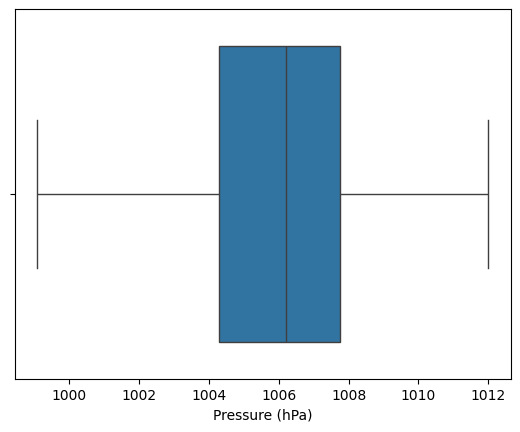

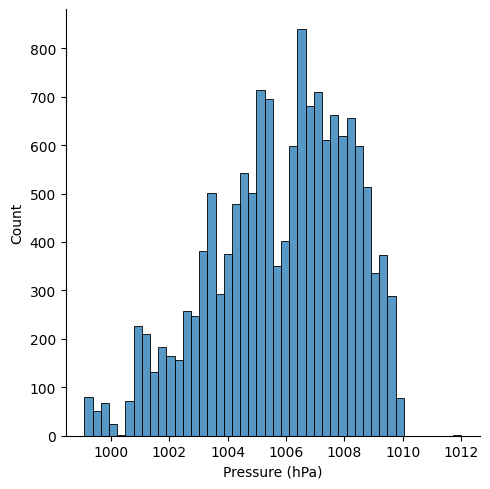

In [ ]:
q1 = df['Pressure (hPa)'].quantile(0.25)
q2 = df['Pressure (hPa)'].quantile(0.75)
iqr = q2 - q1

min_range = q1 - (1.5 * iqr)
max_range = q2 + (1.5 * iqr)

print(f'Min range : {min_range}')
print(f'Max range : {max_range}')

df_filtered = df[(df['Pressure (hPa)'] >= min_range) & (df['Pressure (hPa)'] <= max_range)]
display(df_filtered.head())



sns.boxplot(x = 'Pressure (hPa)', data = df_filtered)

sns.displot(df_filtered['Pressure (hPa)'])
df['Pressure (hPa)']= df_filtered['Pressure (hPa)']

Min range : -24.61
Max range : 91.39


,DHT Temp (°C),Humidity (%),BMP Temp (°C),Pressure (hPa),Altitude (m),Light (lx),Rain_Status
0,29.0,87.3,28.4,1007.15,23.83,0.0,Dry
1,29.0,87.1,28.4,1007.11,24.17,0.0,Dry
2,29.1,87.1,28.3,1007.12,24.08,0.0,Dry
3,29.0,86.9,28.4,1007.10,24.25,0.0,Dry
4,29.0,87.0,28.3,1007.03,24.84,0.0,Dry


/tmp/ipython-input-982790964.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Altitude (m)']= df_filtered['Altitude (m)']


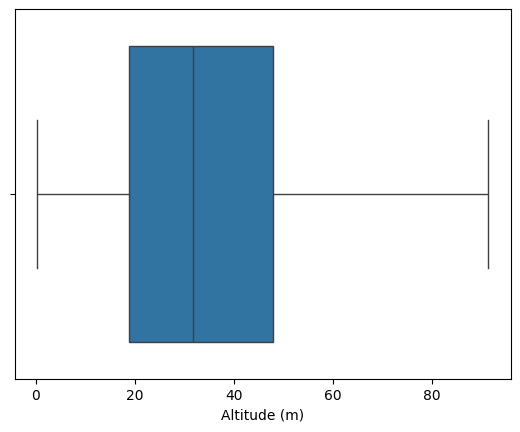

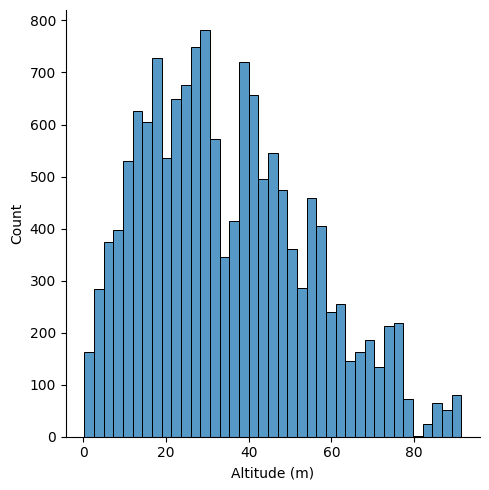

In [ ]:
q1 = df['Altitude (m)'].quantile(0.25)
q2 = df['Altitude (m)'].quantile(0.75)
iqr = q2 - q1

min_range = q1 - (1.5 * iqr)
max_range = q2 + (1.5 * iqr)

print(f'Min range : {min_range}')
print(f'Max range : {max_range}')

df_filtered = df[(df['Altitude (m)'] >= min_range) & (df['Altitude (m)'] <= max_range)]
display(df_filtered.head())



sns.boxplot(x = 'Altitude (m)', data = df_filtered)

sns.displot(df_filtered['Altitude (m)'])
df['Altitude (m)']= df_filtered['Altitude (m)']

In [ ]:
df['Altitude (m)'].min(), df['Altitude (m)'].max()

(0.33, 91.36)

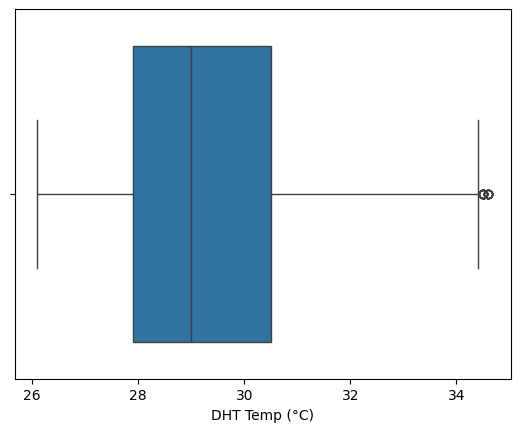

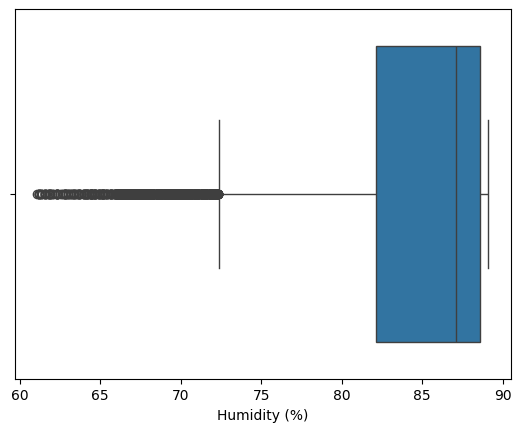

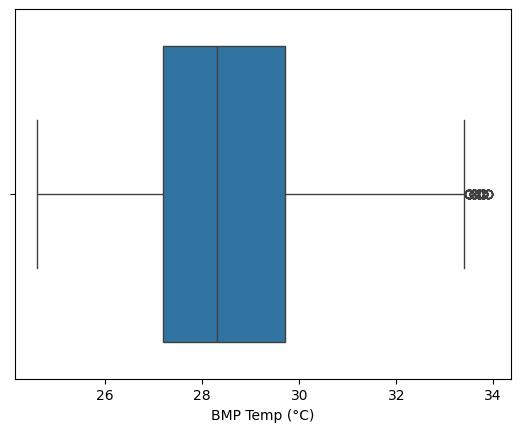

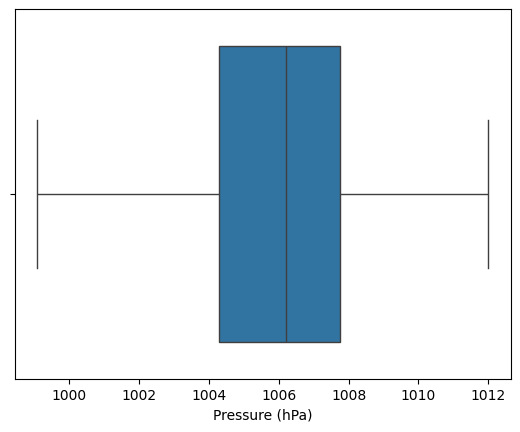

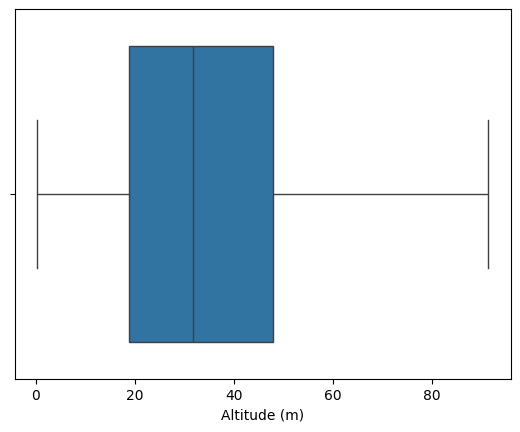

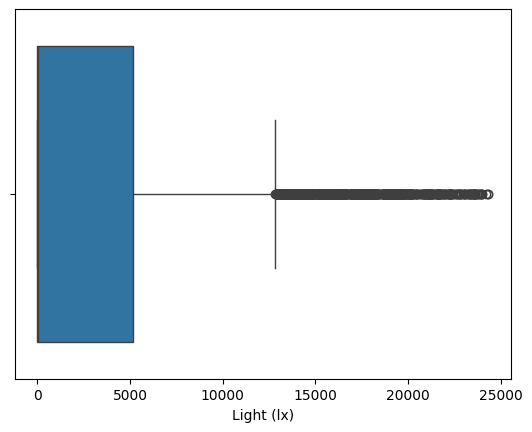

In [ ]:
for i in df.select_dtypes(include='number').columns :
  sns.boxplot(data=df, x=i)
  plt.show()

Min range : -7708.236250000001
Max range : 12849.27375


,DHT Temp (°C),Humidity (%),BMP Temp (°C),Pressure (hPa),Altitude (m),Light (lx),Rain_Status
0,29.0,87.3,28.4,1007.15,23.83,0.0,Dry
1,29.0,87.1,28.4,1007.11,24.17,0.0,Dry
2,29.1,87.1,28.3,1007.12,24.08,0.0,Dry
3,29.0,86.9,28.4,1007.10,24.25,0.0,Dry
4,29.0,87.0,28.3,1007.03,24.84,0.0,Dry


/tmp/ipython-input-2318602117.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Light (lx)']= df_filtered['Light (lx)']


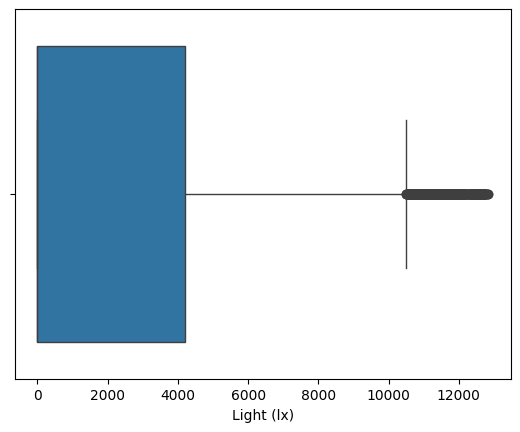

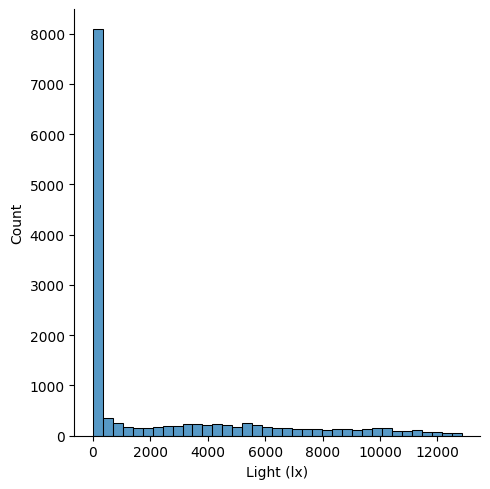

In [ ]:
q1 = df['Light (lx)'].quantile(0.25)
q2 = df['Light (lx)'].quantile(0.75)
iqr = q2 - q1

min_range = q1 - (1.5 * iqr)
max_range = q2 + (1.5 * iqr)

print(f'Min range : {min_range}')
print(f'Max range : {max_range}')

df_filtered = df[(df['Light (lx)'] >= min_range) & (df['Light (lx)'] <= max_range)]
display(df_filtered.head())



sns.boxplot(x = 'Light (lx)', data = df_filtered)

sns.displot(df_filtered['Light (lx)'])
df['Light (lx)']= df_filtered['Light (lx)']

In [ ]:
df['Light (lx)'].min(), df['Light (lx)'].max()

(0.0, 12838.33)

In [ ]:
df.loc[(df['Light (lx)'] >= 0) & (df['Light (lx)'] <= 10), 'Light (lx)'] = 0

print(df[['Light (lx)']].head())


   Light (lx)
0         0.0
1         0.0
2         0.0
3         0.0
4         0.0


In [ ]:
df['Light (lx)'].min(), df['Light (lx)'].max()

(0.0, 12838.33)

In [ ]:
df.to_csv("cleaned_datasetFinal.csv", index=False)

Min range : 22.4
Max range : 34.4


,DHT Temp (°C),Humidity (%),BMP Temp (°C),Pressure (hPa),Altitude (m),Light (lx),Rain_Status
0,29.0,87.3,28.4,1007.15,23.83,0.0,Dry
1,29.0,87.1,28.4,1007.11,24.17,0.0,Dry
2,29.1,87.1,28.3,1007.12,24.08,0.0,Dry
3,29.0,86.9,28.4,1007.10,24.25,0.0,Dry
4,29.0,87.0,28.3,1007.03,24.84,0.0,Dry


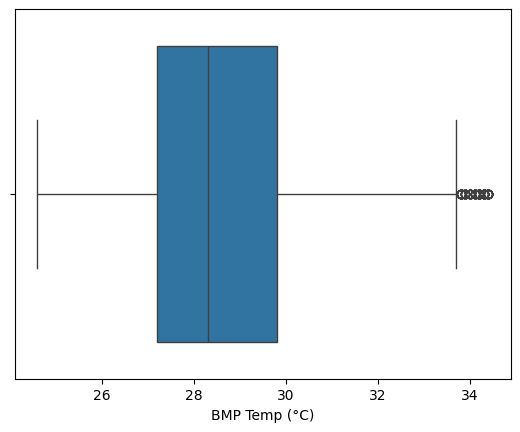

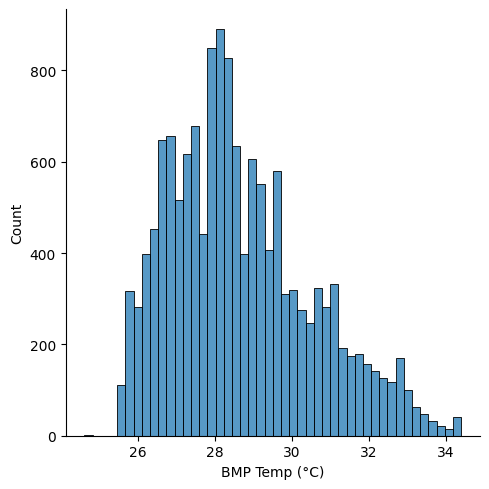

In [ ]:
q1 = df['BMP Temp (°C)'].quantile(0.25)
q2 = df['BMP Temp (°C)'].quantile(0.75)
iqr = q2 - q1

min_range = q1 - (1.5 * iqr)
max_range = q2 + (1.5 * iqr)

print(f'Min range : {min_range}')
print(f'Max range : {max_range}')

df_filtered = df[(df['BMP Temp (°C)'] >= min_range) & (df['BMP Temp (°C)'] <= max_range)]
display(df_filtered.head())



sns.boxplot(x = 'BMP Temp (°C)', data = df_filtered)

sns.displot(df_filtered['BMP Temp (°C)'])
df['BMP Temp (°C)']= df_filtered['BMP Temp (°C)']

Min range : -32.285
Max range : 93.035


,DHT Temp (°C),Humidity (%),BMP Temp (°C),Pressure (hPa),Altitude (m),Light (lx),Rain_Status
0,29.0,87.3,28.4,1007.15,23.83,0.0,Dry
1,29.0,87.1,28.4,1007.11,24.17,0.0,Dry
2,29.1,87.1,28.3,1007.12,24.08,0.0,Dry
3,29.0,86.9,28.4,1007.10,24.25,0.0,Dry
4,29.0,87.0,28.3,1007.03,24.84,0.0,Dry


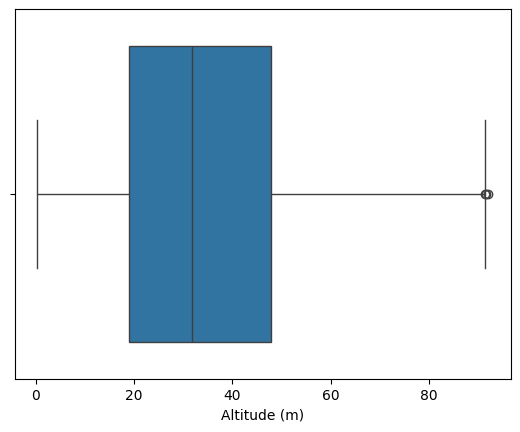

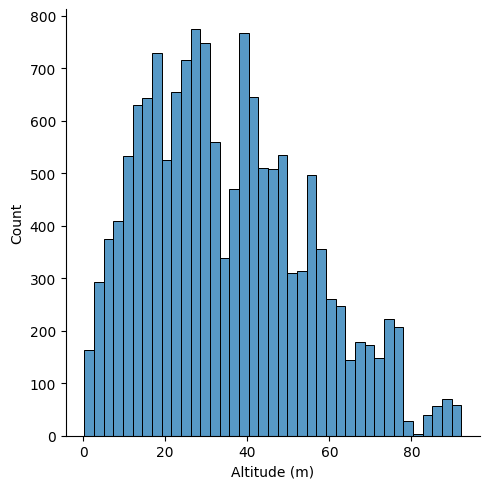

In [ ]:
q1 = df['Altitude (m)'].quantile(0.25)
q2 = df['Altitude (m)'].quantile(0.75)
iqr = q2 - q1

min_range = q1 - (1.5 * iqr)
max_range = q2 + (1.5 * iqr)

print(f'Min range : {min_range}')
print(f'Max range : {max_range}')

df_filtered = df[(df['Altitude (m)'] >= min_range) & (df['Altitude (m)'] <= max_range)]
display(df_filtered.head())



sns.boxplot(x = 'Altitude (m)', data = df_filtered)

sns.displot(df_filtered['Altitude (m)'])
df['Altitude (m)']= df_filtered['Altitude (m)']

Min range : -7834.798750000001
Max range : 13060.21125


,DHT Temp (°C),Humidity (%),BMP Temp (°C),Pressure (hPa),Altitude (m),Light (lx),Rain_Status
0,29.0,87.3,28.4,1007.15,23.83,0.0,Dry
1,29.0,87.1,28.4,1007.11,24.17,0.0,Dry
2,29.1,87.1,28.3,1007.12,24.08,0.0,Dry
3,29.0,86.9,28.4,1007.10,24.25,0.0,Dry
4,29.0,87.0,28.3,1007.03,24.84,0.0,Dry


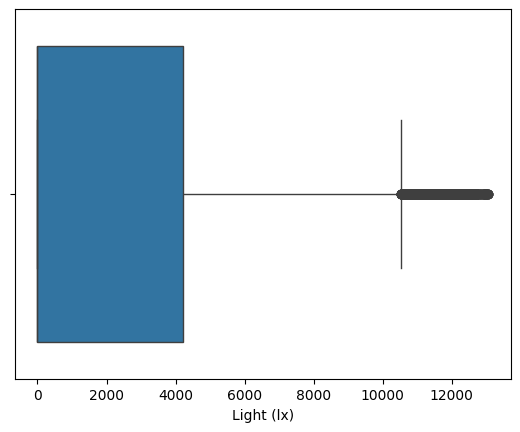

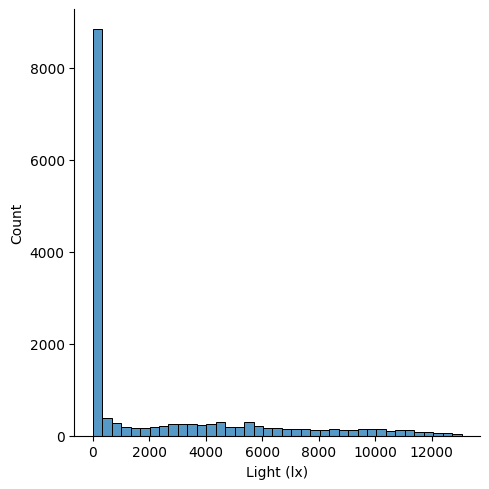

In [ ]:
q1 = df['Light (lx)'].quantile(0.25)
q2 = df['Light (lx)'].quantile(0.75)
iqr = q2 - q1

min_range = q1 - (1.5 * iqr)
max_range = q2 + (1.5 * iqr)

print(f'Min range : {min_range}')
print(f'Max range : {max_range}')

df_filtered = df[(df['Light (lx)'] >= min_range) & (df['Light (lx)'] <= max_range)]
display(df_filtered.head())



sns.boxplot(x = 'Light (lx)', data = df_filtered)

sns.displot(df_filtered['Light (lx)'])
df['Light (lx)']= df_filtered['Light (lx)']

In [ ]:
df.isnull().sum()

,0
DHT Temp (°C),0
Humidity (%),0
BMP Temp (°C),1910
Pressure (hPa),0
Altitude (m),1604
Light (lx),944
Rain_Status,0


In [ ]:
df = df.dropna(subset=['BMP Temp (°C)'])

In [ ]:
df = df.dropna(subset=['Altitude (m)'])
df = df.dropna(subset=['Light (lx)'])

In [ ]:
df.isnull().sum()

,0
DHT Temp (°C),0
Humidity (%),0
BMP Temp (°C),0
Pressure (hPa),0
Altitude (m),0
Light (lx),0
Rain_Status,0


In [ ]:
df.shape, dataset.shape

((13895, 7), (16438, 7))

In [ ]:
df.to_csv('CleanDataset.csv', index=False)

# ***2nd......***

In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df2['Rain_Status'] = le.fit_transform(df2['Rain_Status'])

print(df2['Rain_Status'].unique())

[0 2 3 1]


In [ ]:
df2['Rain_Status'].head(3)

,Rain_Status
0,0
1,0
2,0


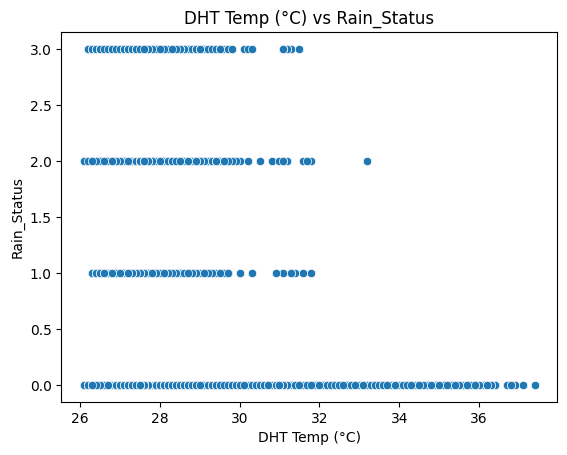

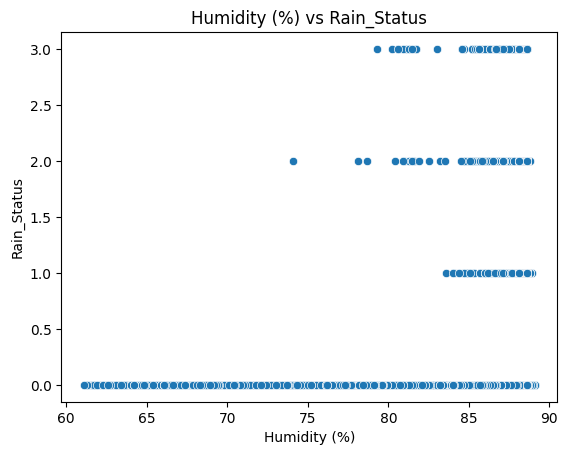

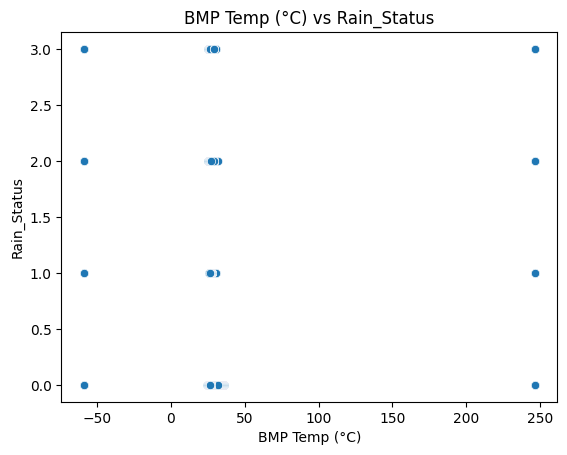

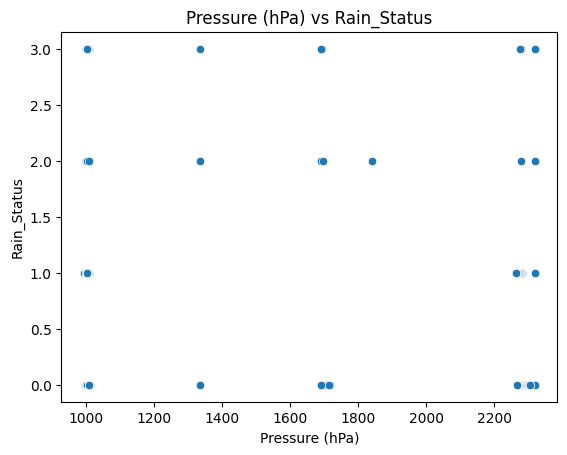

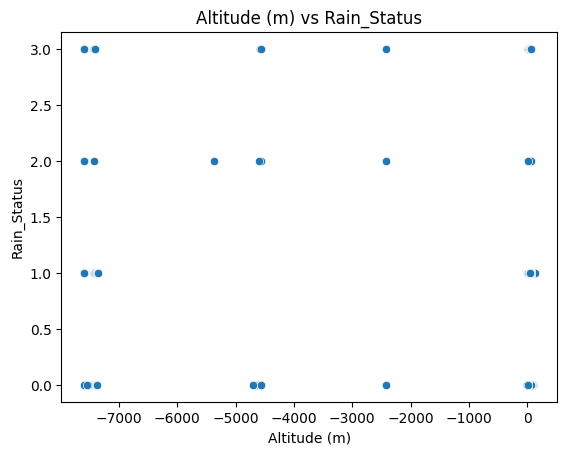

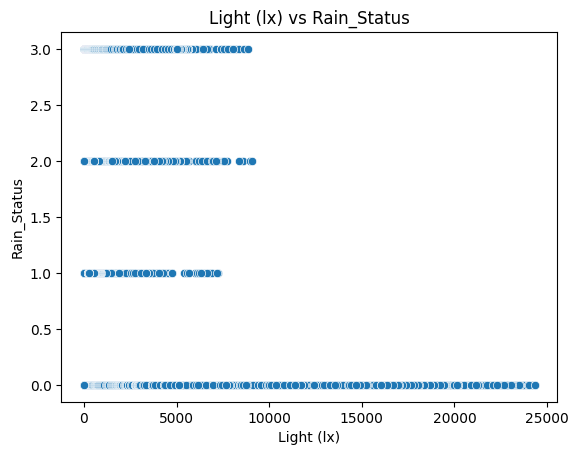

In [ ]:
for i in ['DHT Temp (°C)', 'Humidity (%)', 'BMP Temp (°C)', 'Pressure (hPa)', 'Altitude (m)', 'Light (lx)']:
    sns.scatterplot(data=df, x=i, y='Rain_Status')
    plt.title(f'{i} vs Rain_Status')
    plt.show()

<Axes: >

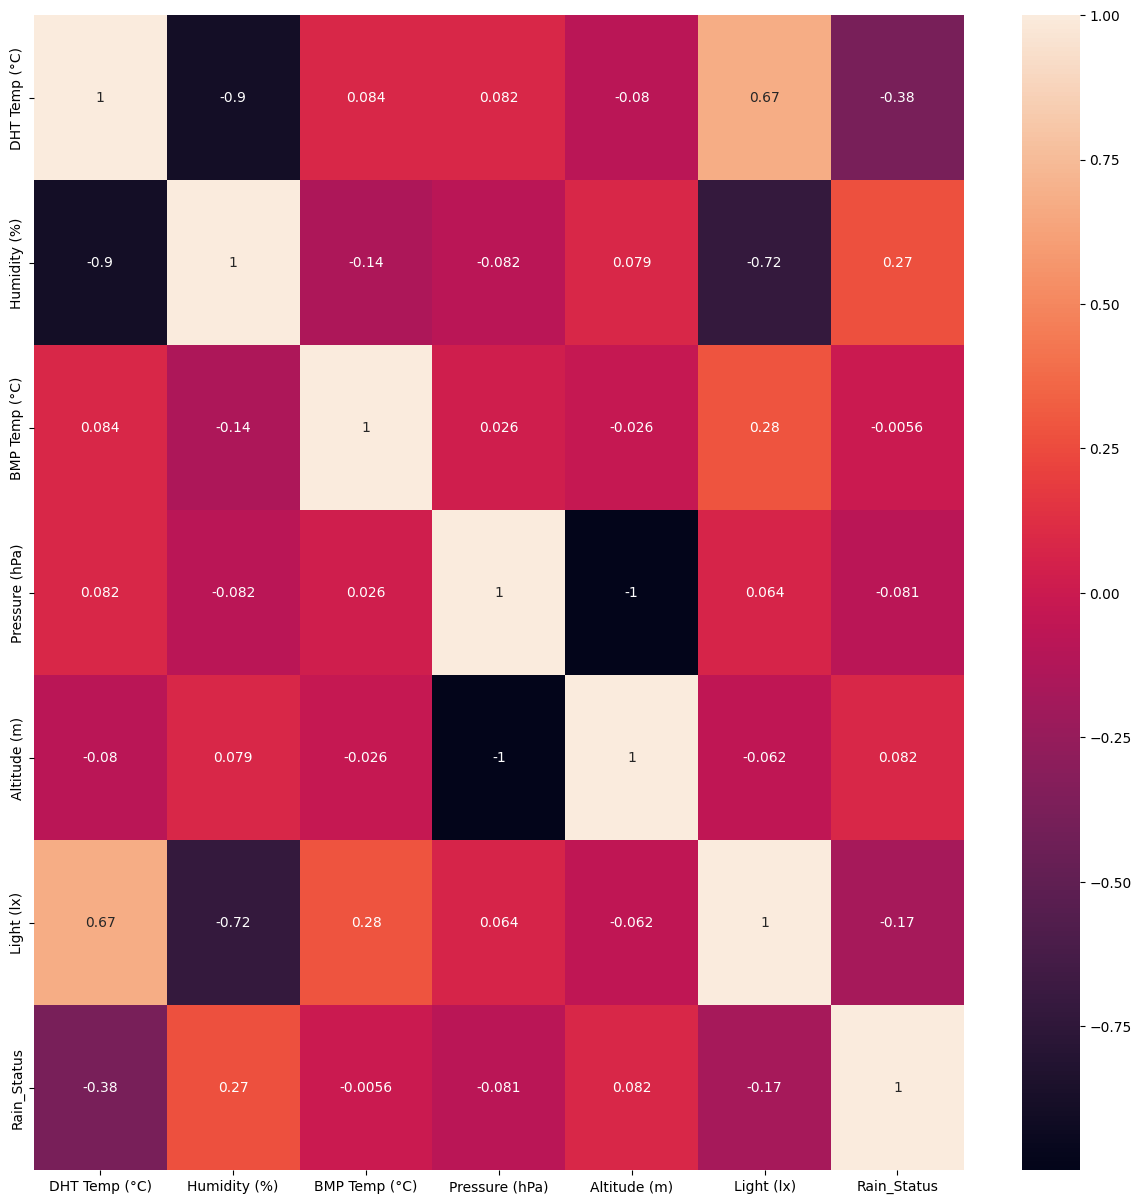

In [ ]:
s = df2.select_dtypes(include="number").corr()
plt.figure(figsize=(15, 15))
sns.heatmap(s, annot=True)

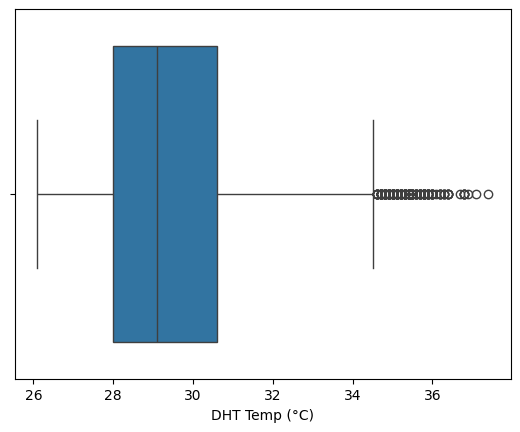

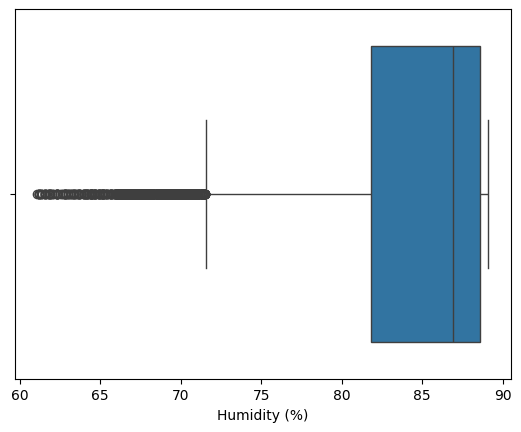

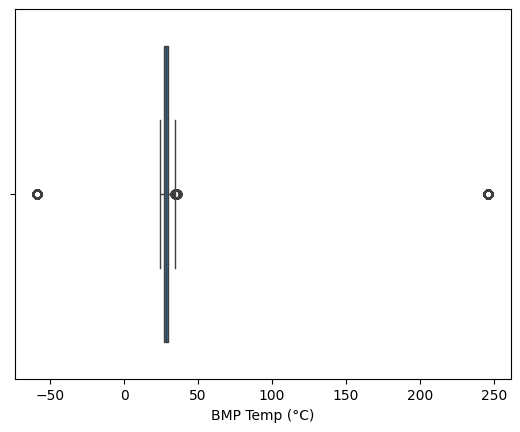

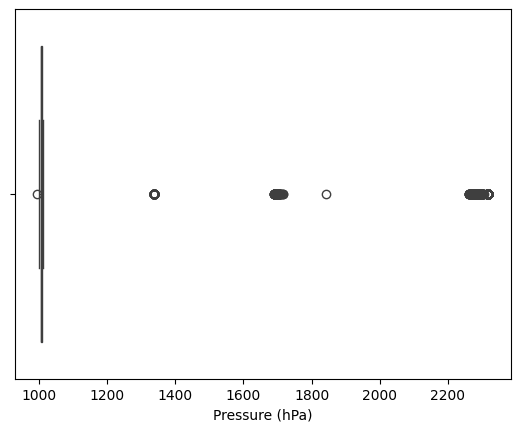

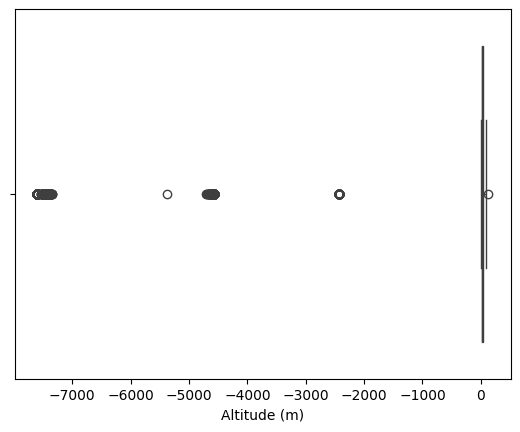

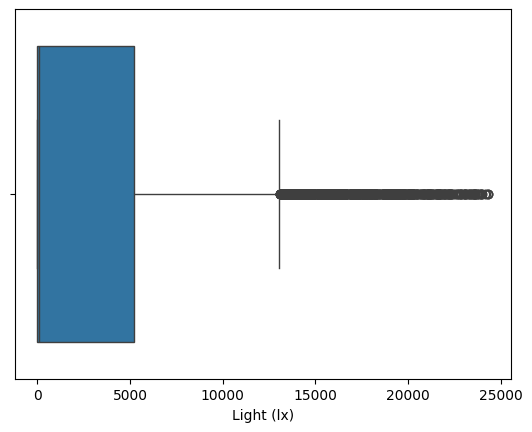

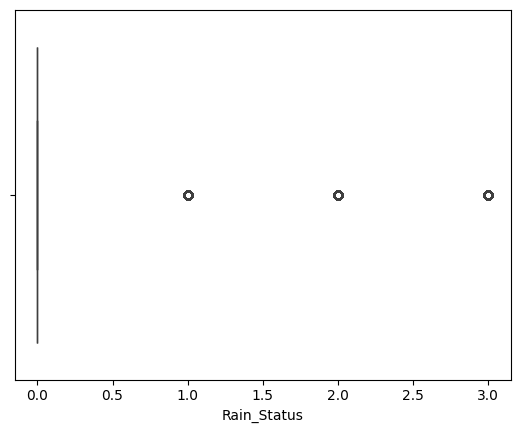

In [ ]:
for i in df2.select_dtypes(include='number').columns :
  sns.boxplot(data=df2, x=i)
  plt.show()

In [ ]:
df2.columns

Index(['DHT Temp (°C)', 'Humidity (%)', 'BMP Temp (°C)', 'Pressure (hPa)',
       'Altitude (m)', 'Light (lx)', 'Rain_Status'],
      dtype='object')

In [ ]:
def wisker(col) :
  q1, q3 = np.percentile(col, [25, 25])
  iqr = q3 - q1
  lw = q1-1.5*iqr
  uw = q3+1.5*iqr
  return lw, uw

In [ ]:
df2['DHT Temp (°C)'].min(), df2['DHT Temp (°C)'].max()

(26.1, 37.4)

In [ ]:
dataset['DHT Temp (°C)'].min(), dataset['DHT Temp (°C)'].max()

(26.1, 37.4)

In [ ]:
df2['BMP Temp (°C)'].min(), df2['BMP Temp (°C)'].max()  ###

(-58.6, 246.3)

In [ ]:
df2['Altitude (m)'].min(), df2['Altitude (m)'].max()  ####

(-7597.46, 128.84)

In [ ]:
for i in ['BMP Temp (°C)', 'Altitude (m)'] :
  lw, uw = wisker(df2[i])
  df2[i] = np.where(df2[i] < lw, lw, df2[i])
  df2[i] = np.where(df2[i]>uw, uw, df2[i])

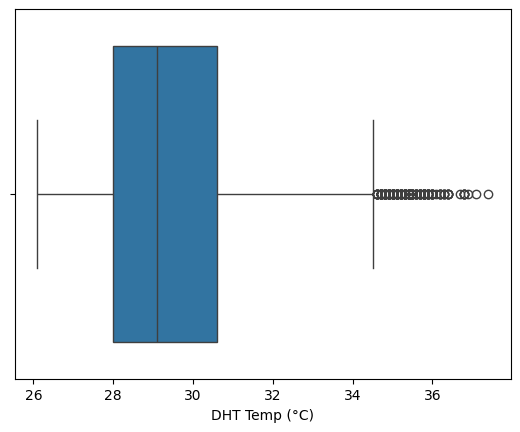

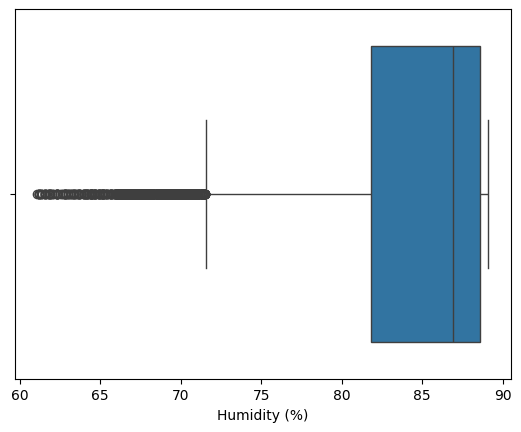

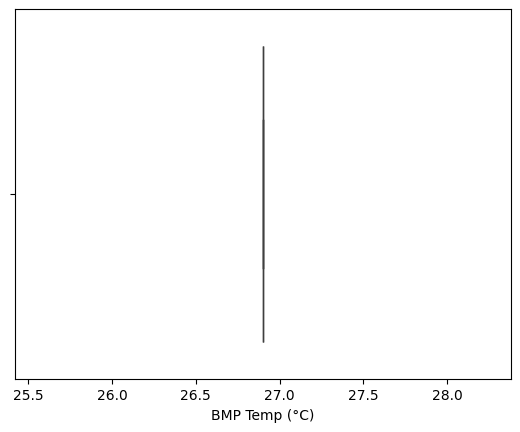

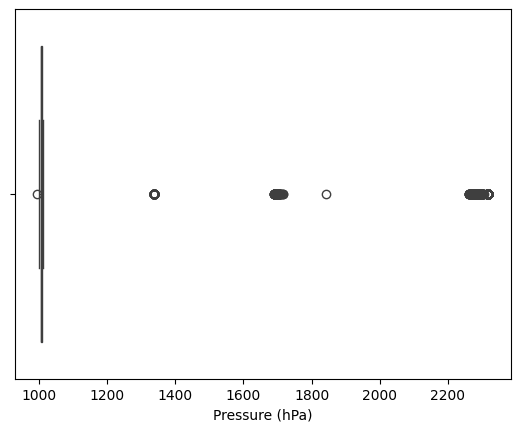

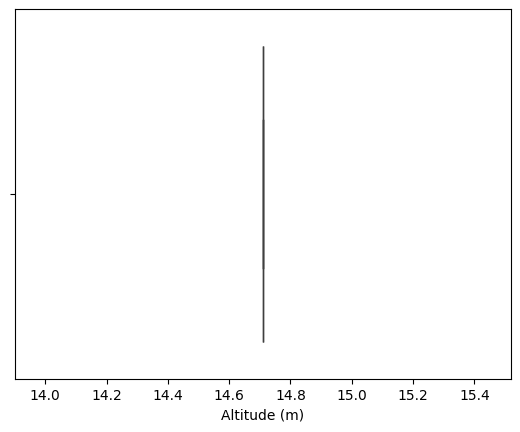

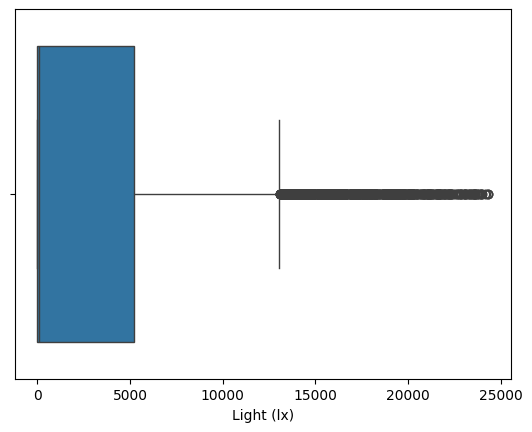

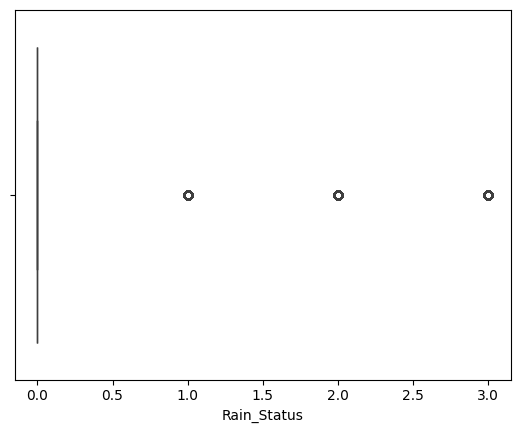

In [ ]:
for i in df.select_dtypes(include='number').columns :
  sns.boxplot(data=df2, x=i)
  plt.show()

In [ ]:
df2['BMP Temp (°C)'].min(), df2['BMP Temp (°C)'].max()  ###

(26.9, 26.9)

In [ ]:
df2['Altitude (m)'].min(), df2['Altitude (m)'].max()  ####

(14.71, 14.71)